In [185]:
import pandas as pd
import numpy as np
import seaborn as sns

In [186]:
df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\PROJECTS\\Python_Calismalar\\data\\olive.csv")
df.head()

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [187]:
df.rename(columns={df.columns[0] : "areastring"}, inplace=True)
df.areastring = df.areastring.map(lambda x: x.split(".")[-1])
acid_list = ["palmitic", "palmitoleic", "stearic", "oleic", "linoleic", "arachidic", "eicosenoic"]
dfsub = df[acid_list].apply(lambda x : x / 100.)
df[acid_list] = dfsub
df.head(5)

,areastring,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,50,0.80,0.46


In [203]:
dfsouth = df[df.region == 1]
dfsouth.region.value_counts().sort_values
dfsouthns = dfsouth[dfsouth.area != 4]
dfsouthns.area.value_counts().sort_values

<bound method Series.sort_values of 3    206
2     56
1     25
Name: area, dtype: int64>

In [204]:
import matplotlib.pyplot as plt
df.area.value_counts().sort_values
df.areastring.value_counts().sort_values

<bound method Series.sort_values of South-Apulia       206
Inland-Sardinia     65
Calabria            56
Umbria              51
East-Liguria        50
West-Liguria        50
Sicily              36
Coast-Sardinia      33
North-Apulia        25
Name: areastring, dtype: int64>

In [249]:
dfsouthns.area.unique()

array([1, 2, 3], dtype=int64)

In [280]:
dfsouthns.area.value_counts().sort_values

<bound method Series.sort_values of 3    206
2     56
1     25
Name: area, dtype: int64>

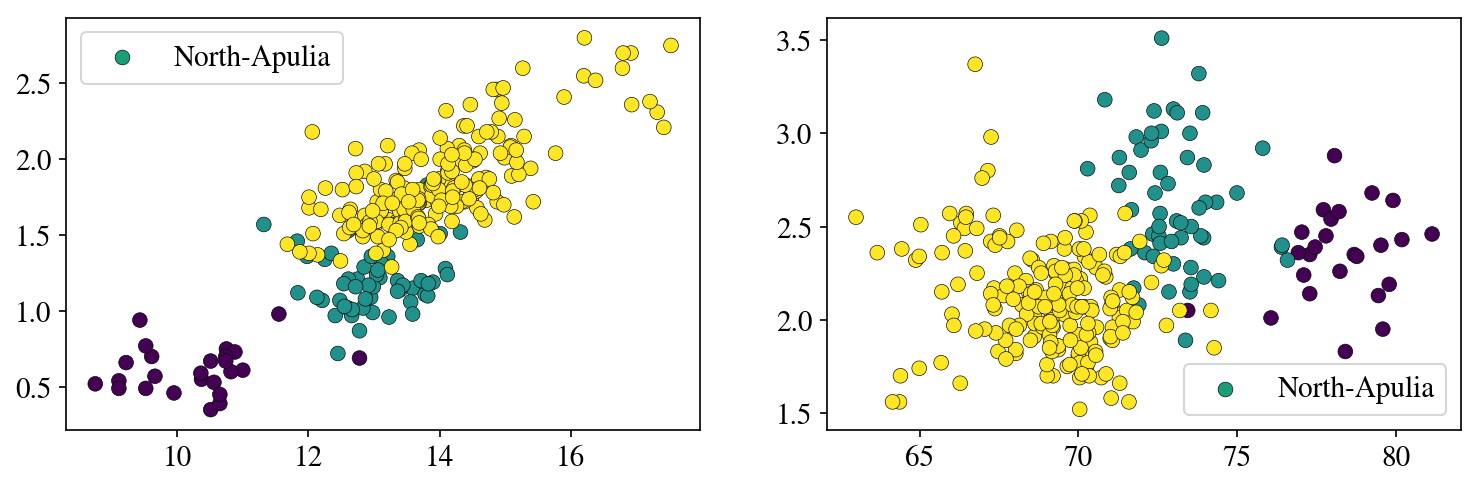

In [274]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(dfsouthns.palmitic, dfsouthns.palmitoleic, c = dfsouthns.area, s = 50, lw = .3, edgecolors="k")
plt.legend(dfsouthns.areastring.unique(),loc = "best")
plt.subplot(222)
plt.scatter(dfsouthns.oleic, dfsouthns.stearic, c = dfsouthns.area, s = 50, lw = .3, edgecolors = "k")
plt.legend(dfsouthns.areastring.unique(), loc = "best")
plt.show()


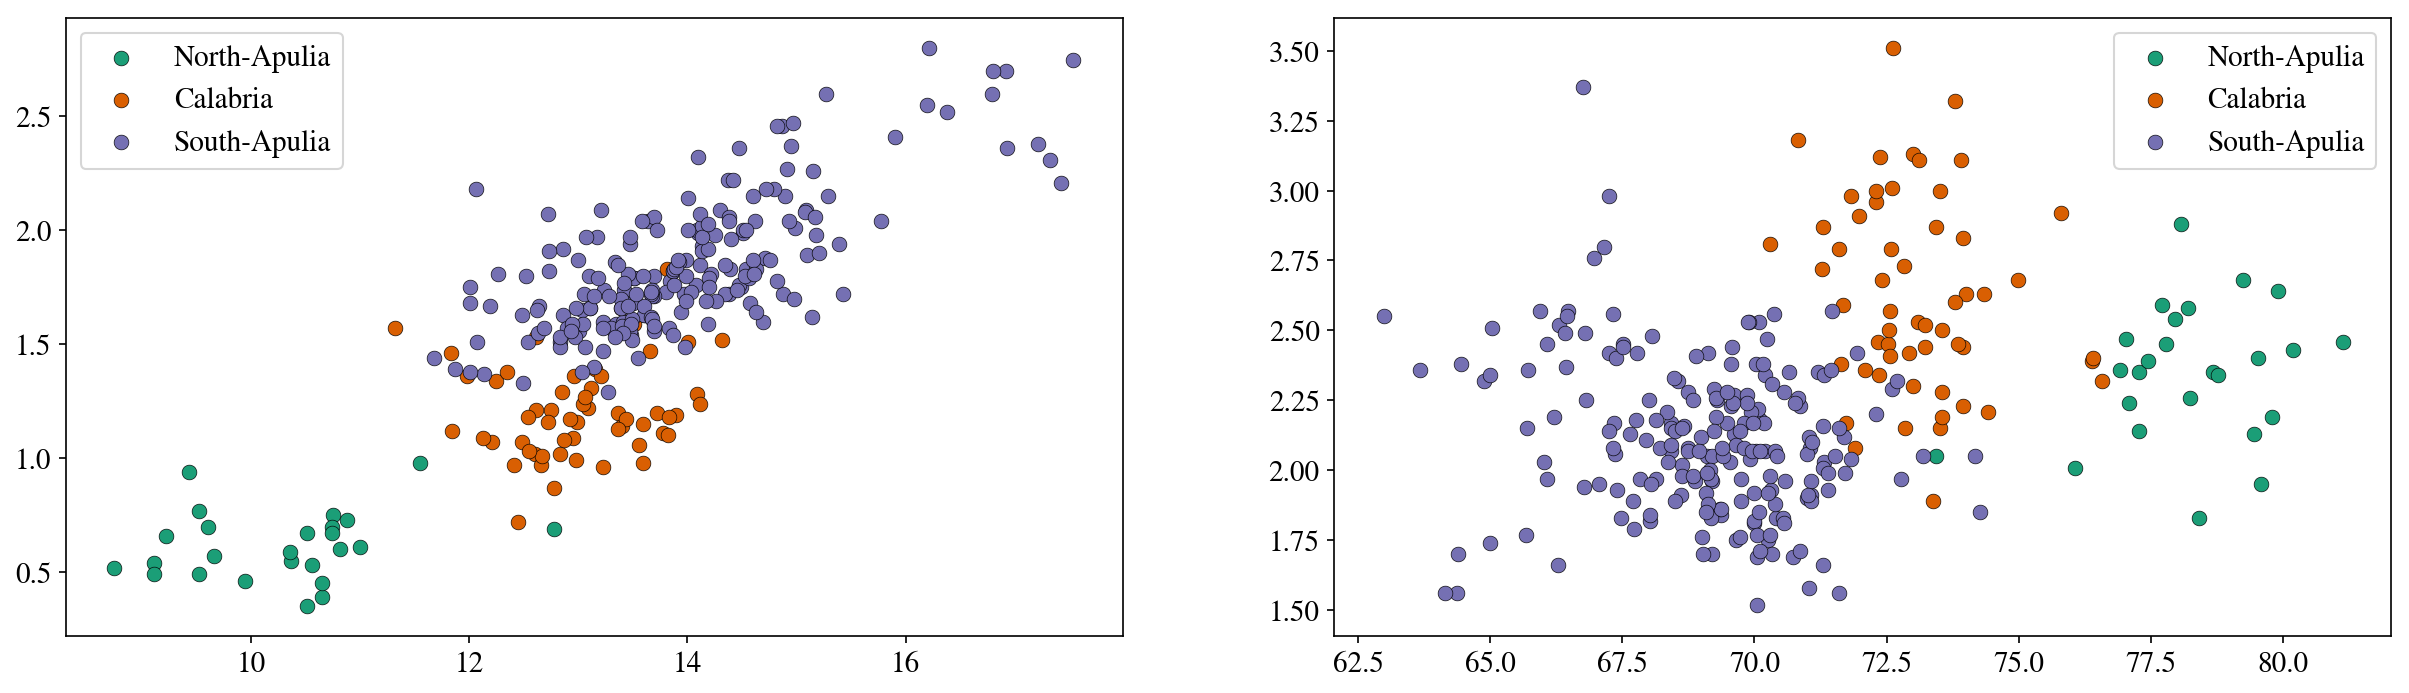

In [298]:
plt.figure(figsize=(20,12))
plt.subplot(221)
plt.scatter(dfsouthns.palmitic[dfsouthns.area == 1], dfsouthns.palmitoleic[dfsouthns.area == 1],s = 50,label = "North-Apulia", lw = .3, edgecolors="k")
plt.scatter(dfsouthns.palmitic[dfsouthns.area == 2], dfsouthns.palmitoleic[dfsouthns.area == 2],s = 50,label = "Calabria",lw = .3, edgecolors="k")
plt.scatter(dfsouthns.palmitic[dfsouthns.area == 3], dfsouthns.palmitoleic[dfsouthns.area == 3],s = 50, lw = .3, label = "South-Apulia", edgecolors="k")
plt.legend(loc = "best")

plt.subplot(222)
plt.scatter(dfsouthns.oleic[dfsouthns.area == 1], dfsouthns.stearic[dfsouthns.area == 1],s = 50,cmap = plt.cm.RdYlBu, label = "North-Apulia", lw = .3, edgecolors="k")
plt.scatter(dfsouthns.oleic[dfsouthns.area == 2], dfsouthns.stearic[dfsouthns.area == 2],s = 50,cmap = plt.cm.RdYlBu, label = "Calabria",lw = .3, edgecolors="k")
plt.scatter(dfsouthns.oleic[dfsouthns.area == 3], dfsouthns.stearic[dfsouthns.area == 3],s = 50, cmap = plt.cm.RdYlBu,  lw = .3, label = "South-Apulia", edgecolors="k")
plt.legend(loc = "best")
plt.show()

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.cross_validation import train_test_split
subdf = dfsouthns[["oleic", "stearic"]]
subdf_std = (subdf - subdf.mean()) / subdf.std()
X = subdf_std.values
y = dfsouthns["area"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = .7, 
                                                   random_state = 0)
Xrt = np.concatenate((X_train, X_test))


In [302]:
X_train.shape
Y_test.shape

(87,)

In [284]:
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE", clf.score(Xte, yte))
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    


In [285]:
clf = SVC().fit(X_train, Y_train)

SCORE 0.977011494253


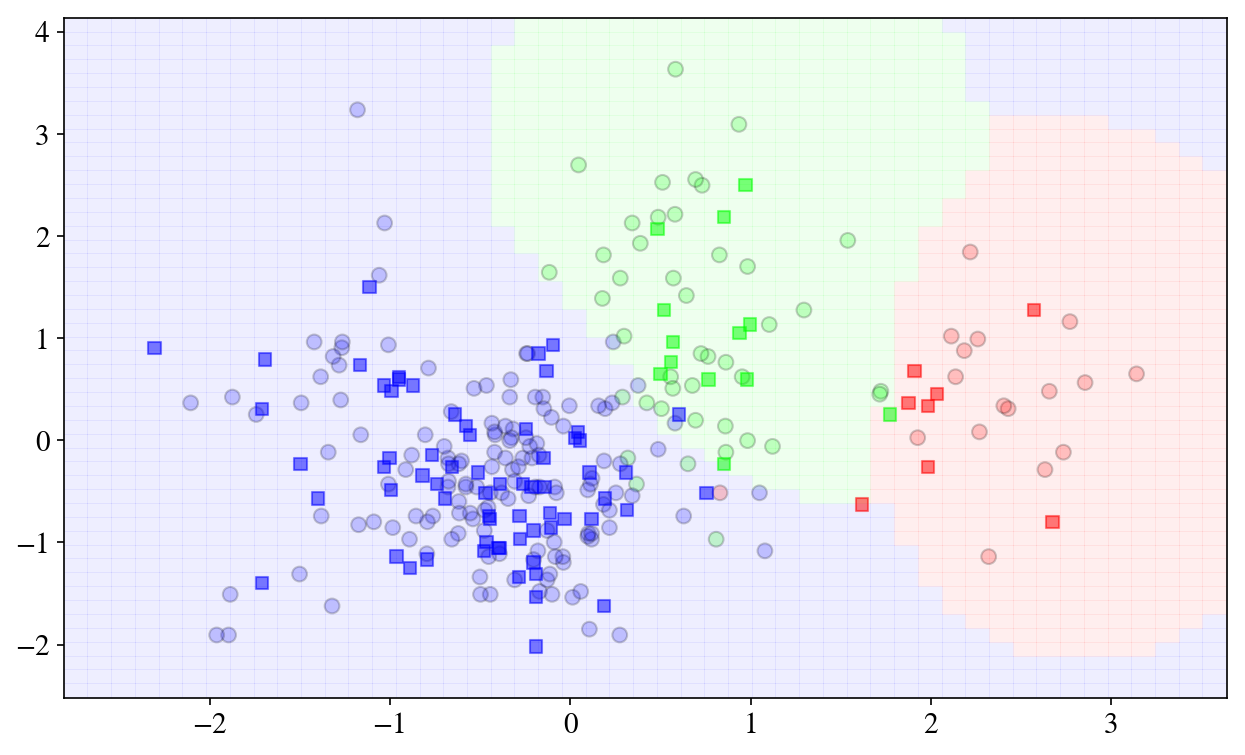

In [286]:
points_plot(Xrt, X_train, X_test, Y_train, Y_test, clf)

In [287]:
from sklearn.svm import SVC
clf = SVC().fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("SCORE", clf.score(X_test, Y_test))

SCORE 0.977011494253


SCORE 0.977011494253


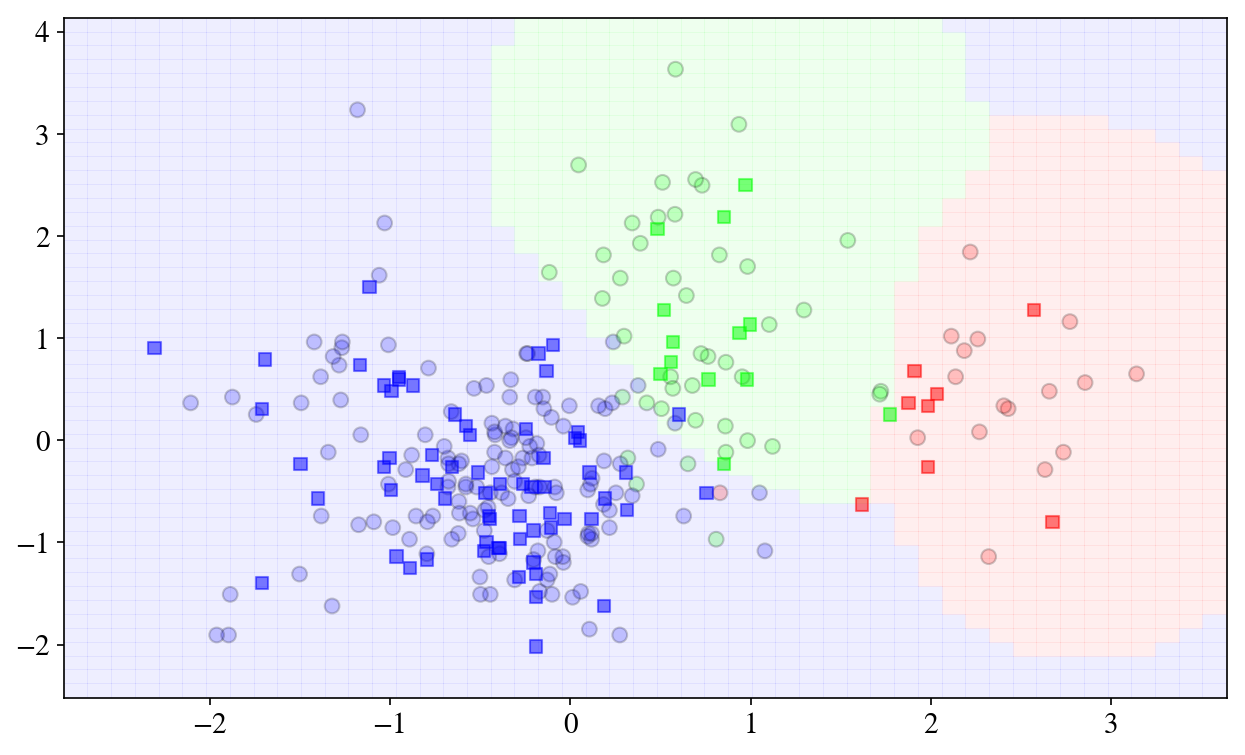

In [288]:
points_plot(Xrt, X_train, X_test, Y_train, Y_test, clf)

In [289]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(20).fit(X_train, Y_train)
clf.predict(X_test)
clf.score(X_test, Y_test)

0.96551724137931039

# Train Validate Test

In [290]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier

In [291]:
clf_base = RandomForestClassifier().fit(X_train, Y_train)
clf.predict(X_test)
clf.score(X_test, Y_test)

0.96551724137931039

In [292]:
parameters = {"n_neighbors" : np.arange(1,80, 1)}
cv = KFold(X_train.shape[0], n_folds=5, shuffle = True, random_state=0)
gs = GridSearchCV(clf, param_grid = parameters, cv = cv)
gs.fit(X_train, Y_train)
print(gs.best_params_, gs.best_score_)
Y_true, Y_pred = Y_test, gs.predict(X_test)
print(classification_report(Y_true, Y_pred))

{'n_neighbors': 5} 0.93
             precision    recall  f1-score   support

          1       0.89      1.00      0.94         8
          2       0.86      0.92      0.89        13
          3       1.00      0.97      0.98        66

avg / total       0.97      0.97      0.97        87



In [293]:
grid = {"kernel" : ["linear", "rbf"], "C": [1.5, 10]}
clf = SVC()
cv = KFold(X_train.shape[0], n_folds= 5, shuffle = True, random_state=0)
gs = GridSearchCV(clf, grid, cv = cv)
gs.fit(X_train, Y_train)
print(gs.best_params_, gs.best_score_)
Y_true, Y_pred = Y_test, gs.predict(X_test)
print(classification_report(Y_true, Y_pred))

{'C': 1.5, 'kernel': 'linear'} 0.935
             precision    recall  f1-score   support

          1       0.89      1.00      0.94         8
          2       0.86      0.92      0.89        13
          3       1.00      0.97      0.98        66

avg / total       0.97      0.97      0.97        87



In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
print(KNeighborsClassifier().get_params())
print("")
print(SVC().get_params())
print("")
print(RandomForestClassifier().get_params())
print("")
print(LogisticRegression().get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol':

SCORE 0.965517241379


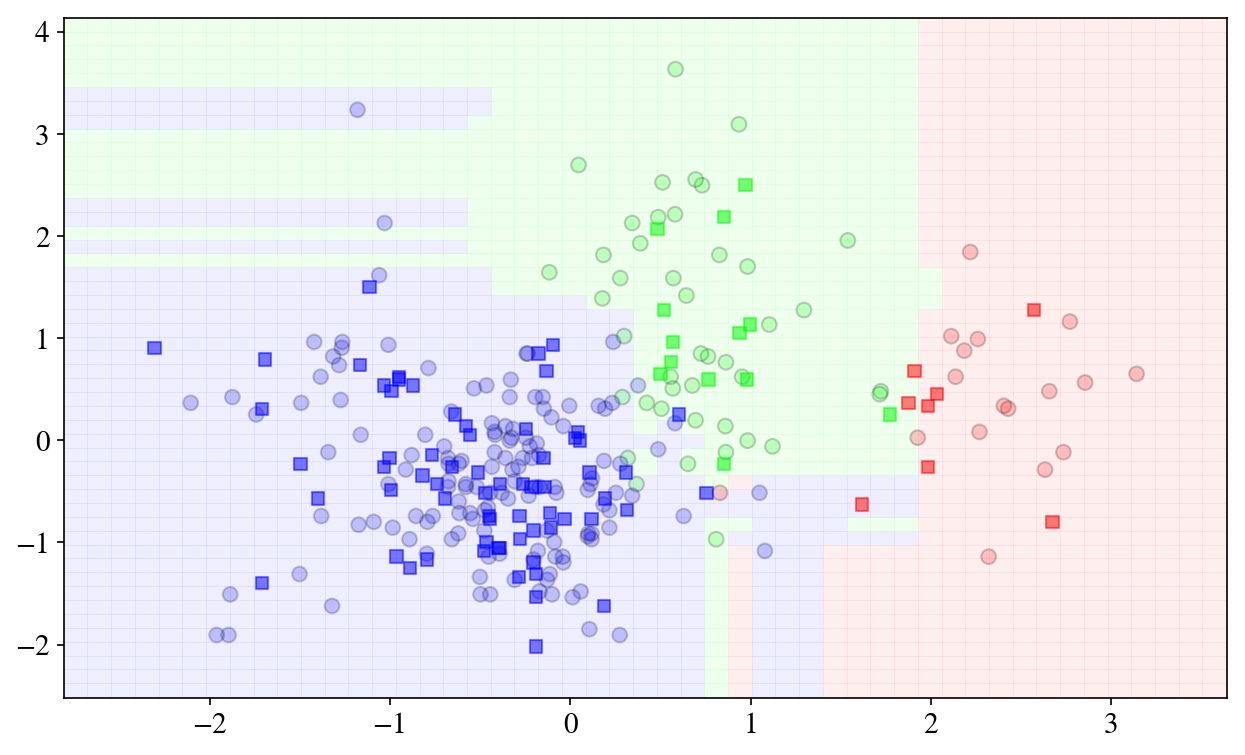

In [295]:
clf = RandomForestClassifier().fit(X_train, Y_train)
points_plot(Xrt, X_train, X_test, Y_train,  Y_test, clf)

In [314]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 3),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
clf = RandomForestClassifier()
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=20)
random_search.fit(X_train, Y_train)
print(random_search.best_params_, random_search.best_score_)
Y_true, Y_pred  = Y_test, random_search.predict(X_test)
print(classification_report(Y_true, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 3} 0.945
             precision    recall  f1-score   support

          1       0.88      0.88      0.88         8
          2       0.87      1.00      0.93        13
          3       0.98      0.95      0.97        66

avg / total       0.96      0.95      0.95        87

[[ 7  0  1]
 [ 0 13  0]
 [ 1  2 63]]


In [315]:
X_test[:5]

array([[ 0.52074303,  1.2750674 ],
       [-0.69300507, -0.5714147 ],
       [-0.9633945 , -1.13956303],
       [-0.94837287,  0.5932894 ],
       [-0.14922189, -0.17371086]])

In [320]:
y_pred_small = random_search.predict(X_test[:5])
confusion_matrix(Y_true[:5], y_pred_small)

array([[1, 0],
       [0, 4]], dtype=int64)